In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
checks = [i for i in range(5,75,5)]
deploy_path = [f"./testResult/SmartDeploy_{i}.csv" for i in checks]
evaluate_path = [f"./testResult/SmartPolicy_{i}.csv" for i in checks]

In [22]:
print(deploy_path[3])
pd.read_csv(deploy_path[3]).sort_values('private attributes')['gas used']

./testResult/SmartDeploy_20.csv


0    748024
4    913320
5    912468
1    911820
2    910896
3    863582
Name: gas used, dtype: int64

In [23]:
df_deploy

,0,1,2,3,4,5
5,644268,809167,810025,809797,809569,762869
10,674609,792098,840433,839953,839521,839065
15,717763,881535,834400,883239,882843,882195
20,748024,911820,910896,863582,913320,912468
25,778318,942316,941452,940354,892775,943398
30,818326,981877,980581,979501,931706,983191
35,864806,1027956,1026432,1025110,977075,1029468
40,895100,1057798,1056058,1054534,1006282,1059520
45,925373,1087586,1085684,1083932,1035512,1089580
50,955623,1119650,1117478,1115316,1113354,1064706


In [24]:
df = pd.DataFrame(index=checks)
data_index = [i for i in range(6)]
clmns = []
for path in deploy_path:
    a = pd.read_csv(path).sort_values('private attributes')['gas used'][:6]
    a.index = data_index
    clmns.append(a)

df_deploy = pd.concat(clmns, axis=1, ignore_index=True).T
df_deploy.index = df.index

clmns = []
for path in evaluate_path:
    clmns.append(pd.read_csv(path)['gas used'][:6])

df_evaluate = pd.concat(clmns, axis=1, ignore_index=True).T
df_evaluate.index = df.index
    
    

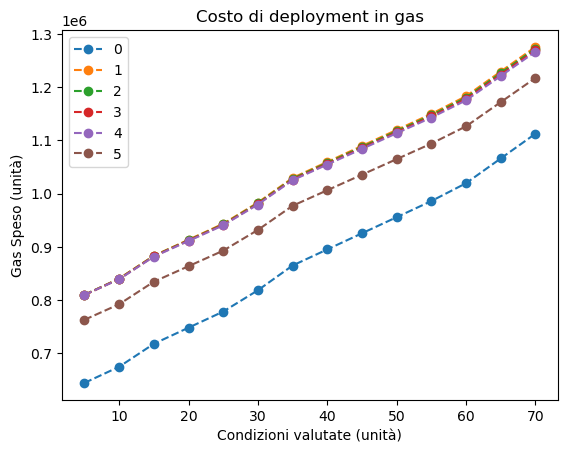

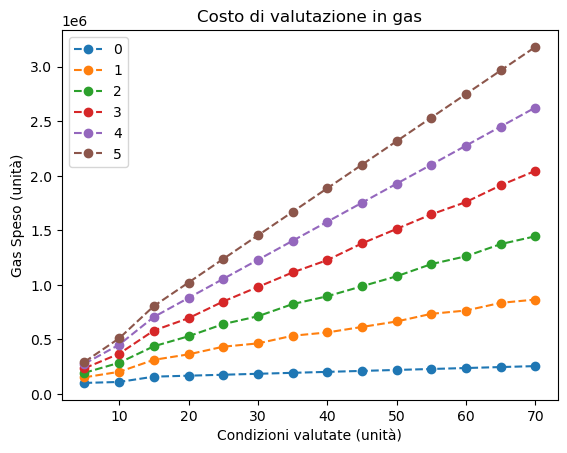

In [35]:
df_deploy.plot(style='o--', title="Costo di deployment in gas", xlabel="Condizioni valutate (unità)", ylabel="Gas Speso (unità)").get_figure().savefig("deploy.png")
df_evaluate.plot(style='o--', xlabel="Condizioni valutate (unità)", ylabel="Gas Speso (unità)",title="Costo di valutazione in gas").get_figure().savefig("evaluate.png")